In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "keerthiks30" # username from the json file
os.environ['KAGGLE_KEY'] = "00b7ff7f9517a3a4c10d840d244af66e" # key from the json file
!kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia

100% 2.05G/2.06G [00:19<00:00, 111MB/s]
100% 2.06G/2.06G [00:19<00:00, 112MB/s]


In [2]:
!unzip "/content/chest-xray-covid19-pneumonia.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Data/train/COVID19/COVID19(228).jpg  
  inflating: Data/train/COVID19/COVID19(229).jpg  
  inflating: Data/train/COVID19/COVID19(23).jpg  
  inflating: Data/train/COVID19/COVID19(230).jpg  
  inflating: Data/train/COVID19/COVID19(231).jpg  
  inflating: Data/train/COVID19/COVID19(232).jpg  
  inflating: Data/train/COVID19/COVID19(233).jpg  
  inflating: Data/train/COVID19/COVID19(234).jpg  
  inflating: Data/train/COVID19/COVID19(235).jpg  
  inflating: Data/train/COVID19/COVID19(236).jpg  
  inflating: Data/train/COVID19/COVID19(237).jpg  
  inflating: Data/train/COVID19/COVID19(238).jpg  
  inflating: Data/train/COVID19/COVID19(239).jpg  
  inflating: Data/train/COVID19/COVID19(24).jpg  
  inflating: Data/train/COVID19/COVID19(240).jpg  
  inflating: Data/train/COVID19/COVID19(241).jpg  
  inflating: Data/train/COVID19/COVID19(242).jpg  
  inflating: Data/train/COVID19/COVID19(243).jpg  
  inflating: Data/train/COVID19/C

Populating the interactive namespace from numpy and matplotlib


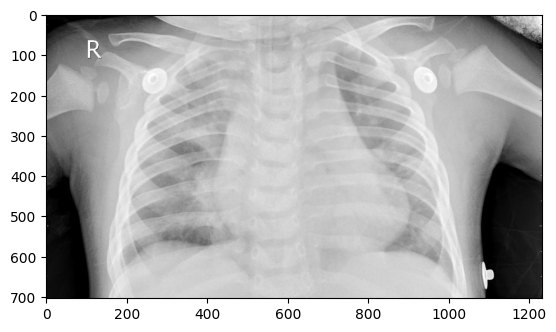

In [3]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('Data/train/PNEUMONIA/PNEUMONIA(997).jpg')
imgplot = plt.imshow(img)
plt.show()

In [4]:
img.shape

(704, 1232, 3)

# IMPORTING THE LIBRARIES

In [5]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD,Adam
from keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [6]:
#Libraries for image
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# LOAD  IMAGES AND ADD VARIATIONS


---



In [7]:
img_width, img_height = 150,150  #width and height of the images
train_data_dir = r"/content/Data/train"
validation_data_dir=r"/content/Data/test"
nb_train_sample =100
nb_validation_samples =100
epochs =20
batch_size= 32



In [8]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)

In [9]:
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)

In [10]:
test_datagen=ImageDataGenerator (rescale=1. /255)

In [12]:
train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='categorical',classes=['COVID19','NORMAL','PNEUMONIA'])

Found 5144 images belonging to 3 classes.


In [13]:
validation_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='categorical')

Found 1288 images belonging to 3 classes.


# CREATE MODEL

---



USING SINGLE MODEL :

In [14]:
model=Sequential()

#BLOCK-1
model.add(Conv2D(64,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

#BLOCK-2
model.add(Conv2D(128,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

#BLOCK-3
model.add(Conv2D(256,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

#CLASSIFICATION
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))



model.add(Dense(3, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 256)      0

# COMPLING


---



In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
training = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
)

<ipython-input-17-1de2e4b0adbc>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model.fit_generator(


Epoch 1/20
161/161 [==============================] - 108s 591ms/step - loss: 0.5887 - accuracy: 0.7584 - val_loss: 0.2601 - val_accuracy: 0.8991
Epoch 2/20
161/161 [==============================] - 91s 568ms/step - loss: 0.3902 - accuracy: 0.8499 - val_loss: 0.2241 - val_accuracy: 0.9216
Epoch 3/20
161/161 [==============================] - 92s 572ms/step - loss: 0.3301 - accuracy: 0.8760 - val_loss: 0.2135 - val_accuracy: 0.9185
Epoch 4/20
161/161 [==============================] - 88s 547ms/step - loss: 0.2856 - accuracy: 0.8874 - val_loss: 0.1921 - val_accuracy: 0.9317
Epoch 5/20
161/161 [==============================] - 88s 544ms/step - loss: 0.2660 - accuracy: 0.8999 - val_loss: 0.2518 - val_accuracy: 0.9006
Epoch 6/20
161/161 [==============================] - 90s 557ms/step - loss: 0.2533 - accuracy: 0.9069 - val_loss: 0.1799 - val_accuracy: 0.9325
Epoch 7/20
161/161 [==============================] - 90s 557ms/step - loss: 0.2312 - accuracy: 0.9154 - val_loss: 0.1638 - val_a

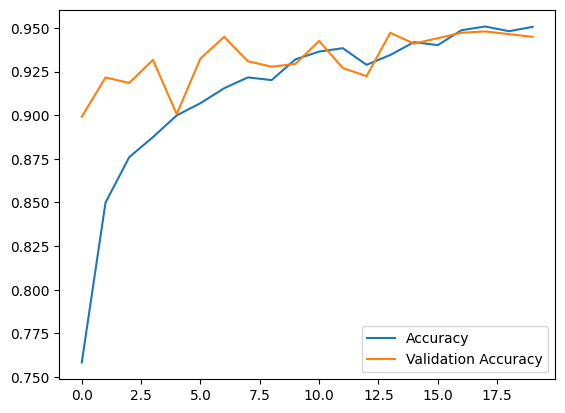

In [18]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.show()

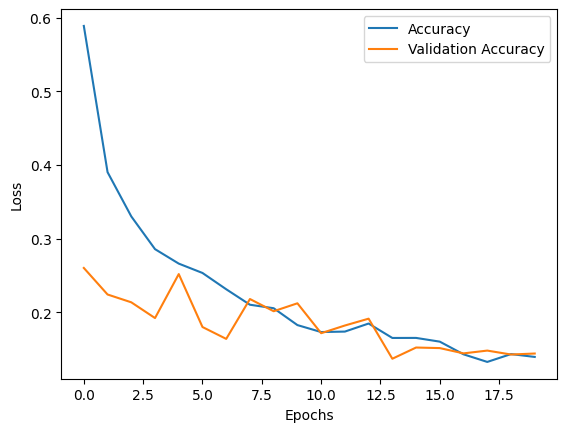

In [19]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [20]:
def pred(a):
  img_pred = image.load_img(a,target_size=(150,150))
  img_pred=image.img_to_array(img_pred)
  img_pred=np.expand_dims(img_pred, axis=0)
  result=model.predict(img_pred)

  print(result)

  if result[0][0]==1:
    prediction ="COVID-19"
  elif result[0][1]==1:
    prediction ="NORMAL"
  else:
    prediction="PNEUMONIA"

  img=mpimg.imread(a)
  imgplot = plt.imshow(img)
  plt.show()

  print('Prediction: ',prediction)

1/1 [==============================] - 0s 33ms/step
[[0. 0. 1.]]


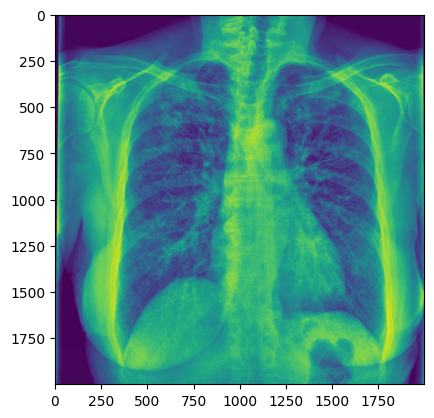

Prediction:  PNEUMONIA


In [22]:
pred('/content/Data/test/COVID19/COVID19(463).jpg')

# TRANSFER LEARNING

---



In [27]:
from keras import optimizers
from keras.applications import VGG19
from keras.models import Model #Functional model
from keras import applications

In [28]:
pre_trained_model=VGG19(input_shape=input_shape,include_top=False , weights="imagenet")

80134624/80134624 [==============================] - 1s 0us/step


In [29]:
for layer in pre_trained_model.layers[:15] :
  #upto 15 training
  layer.trainable=False
for layer in pre_trained_model.layers[15:] :
  #upto 15 training
  layer.trainable=True
last_layer=pre_trained_model.get_layer('block5_pool')
last_output=last_layer.output

In [30]:
# LAYERS FOR CLASSIFICATION

from keras.layers import GlobalMaxPool2D
#flatten the output layer to one dimension
x=GlobalMaxPool2D()(last_output)
#add a fully connected layer with 512 hidden units and RELU activation
x=Dense(512,activation='relu')(x)
#add dropout rate of 0.5
x=Dropout(0.5)(x)
#add final sigmoid layer for classification
x=Dense(1,activation='sigmoid')(x)

model2=Model(pre_trained_model.input,x)

COMPILING :

---



In [31]:
model2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
training1 = model2.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
)

<ipython-input-32-4b8d42768e9c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training1 = model2.fit_generator(


Epoch 1/20
161/161 [==============================] - 120s 686ms/step - loss: 0.6789 - accuracy: 0.6632 - val_loss: 0.6369 - val_accuracy: 0.6667
Epoch 2/20
161/161 [==============================] - 98s 609ms/step - loss: 0.6372 - accuracy: 0.6667 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 3/20
161/161 [==============================] - 95s 589ms/step - loss: 0.6370 - accuracy: 0.6667 - val_loss: 0.6369 - val_accuracy: 0.6667
Epoch 4/20
161/161 [==============================] - 93s 574ms/step - loss: 0.6370 - accuracy: 0.6667 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 5/20
161/161 [==============================] - 92s 571ms/step - loss: 0.6369 - accuracy: 0.6667 - val_loss: 0.6365 - val_accuracy: 0.6667
Epoch 6/20
161/161 [==============================] - 91s 568ms/step - loss: 0.6369 - accuracy: 0.6667 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 7/20
161/161 [==============================] - 90s 561ms/step - loss: 0.6369 - accuracy: 0.6667 - val_loss: 0.6365 - val_a

In [ ]:
def pred(a):
  img_pred = image.load_img(a,target_size=(150,150))
  img_pred=image.img_to_array(img_pred)
  img_pred=np.expand_dims(img_pred, axis=0)
  result=model.predict(img_pred)

  print(result)

  if result[0][0]==1:
    prediction ="COVID-19"
  elif result[0][1]==1:
    prediction ="NORMAL"
  else:
    prediction="PNEUMONIA"

  img=mpimg.imread(a)
  imgplot = plt.imshow(img)
  plt.show()

  print('Prediction: ',prediction)

1/1 [==============================] - 0s 19ms/step
[[1. 0. 0.]]


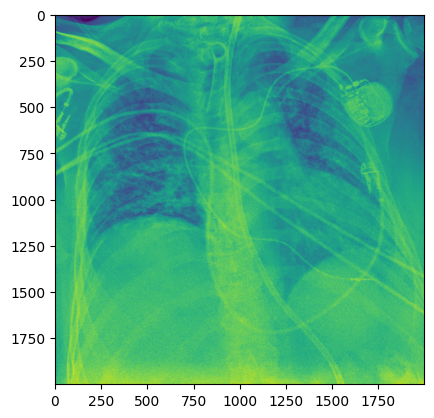

Prediction:  COVID-19


In [ ]:
pred('/content/Data/train/COVID19/COVID19(112).jpg')